# Explorative data analysis

### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_pickle('data/train_clean.pkl')
df_train_calender = pd.read_pickle('data/train_calender_clean.pkl')
df_test = pd.read_pickle('data/test_clean.pkl')
df_test_calender = pd.read_pickle('data/test_calender_clean.pkl')

### Visualization of features

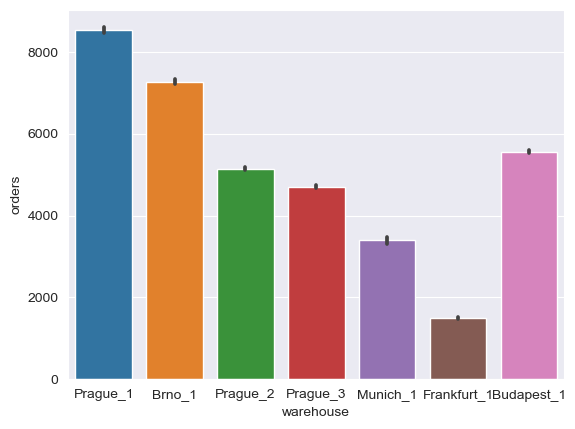

In [3]:
sns.barplot(x=df_train['warehouse'], y=df_train['orders'], data=df_train)
plt.show()

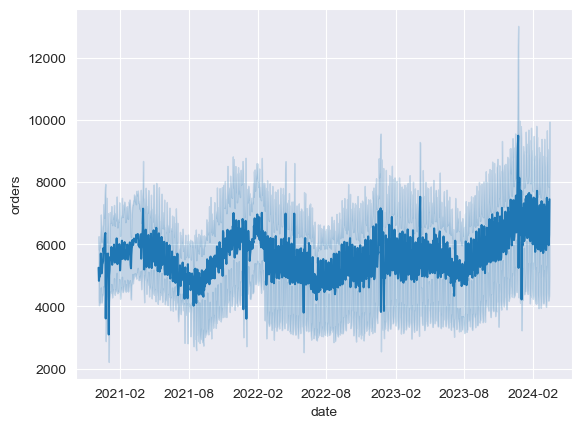

In [4]:
import matplotlib.dates as mdates

# Convert the date column to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Plot the line plot with date and orders
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
sns.lineplot(x=df_train['date'], y=df_train['orders'], data=df_train)

# Format the x-axis to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Add numbering to the y-axis
plt.yticks()

plt.show()

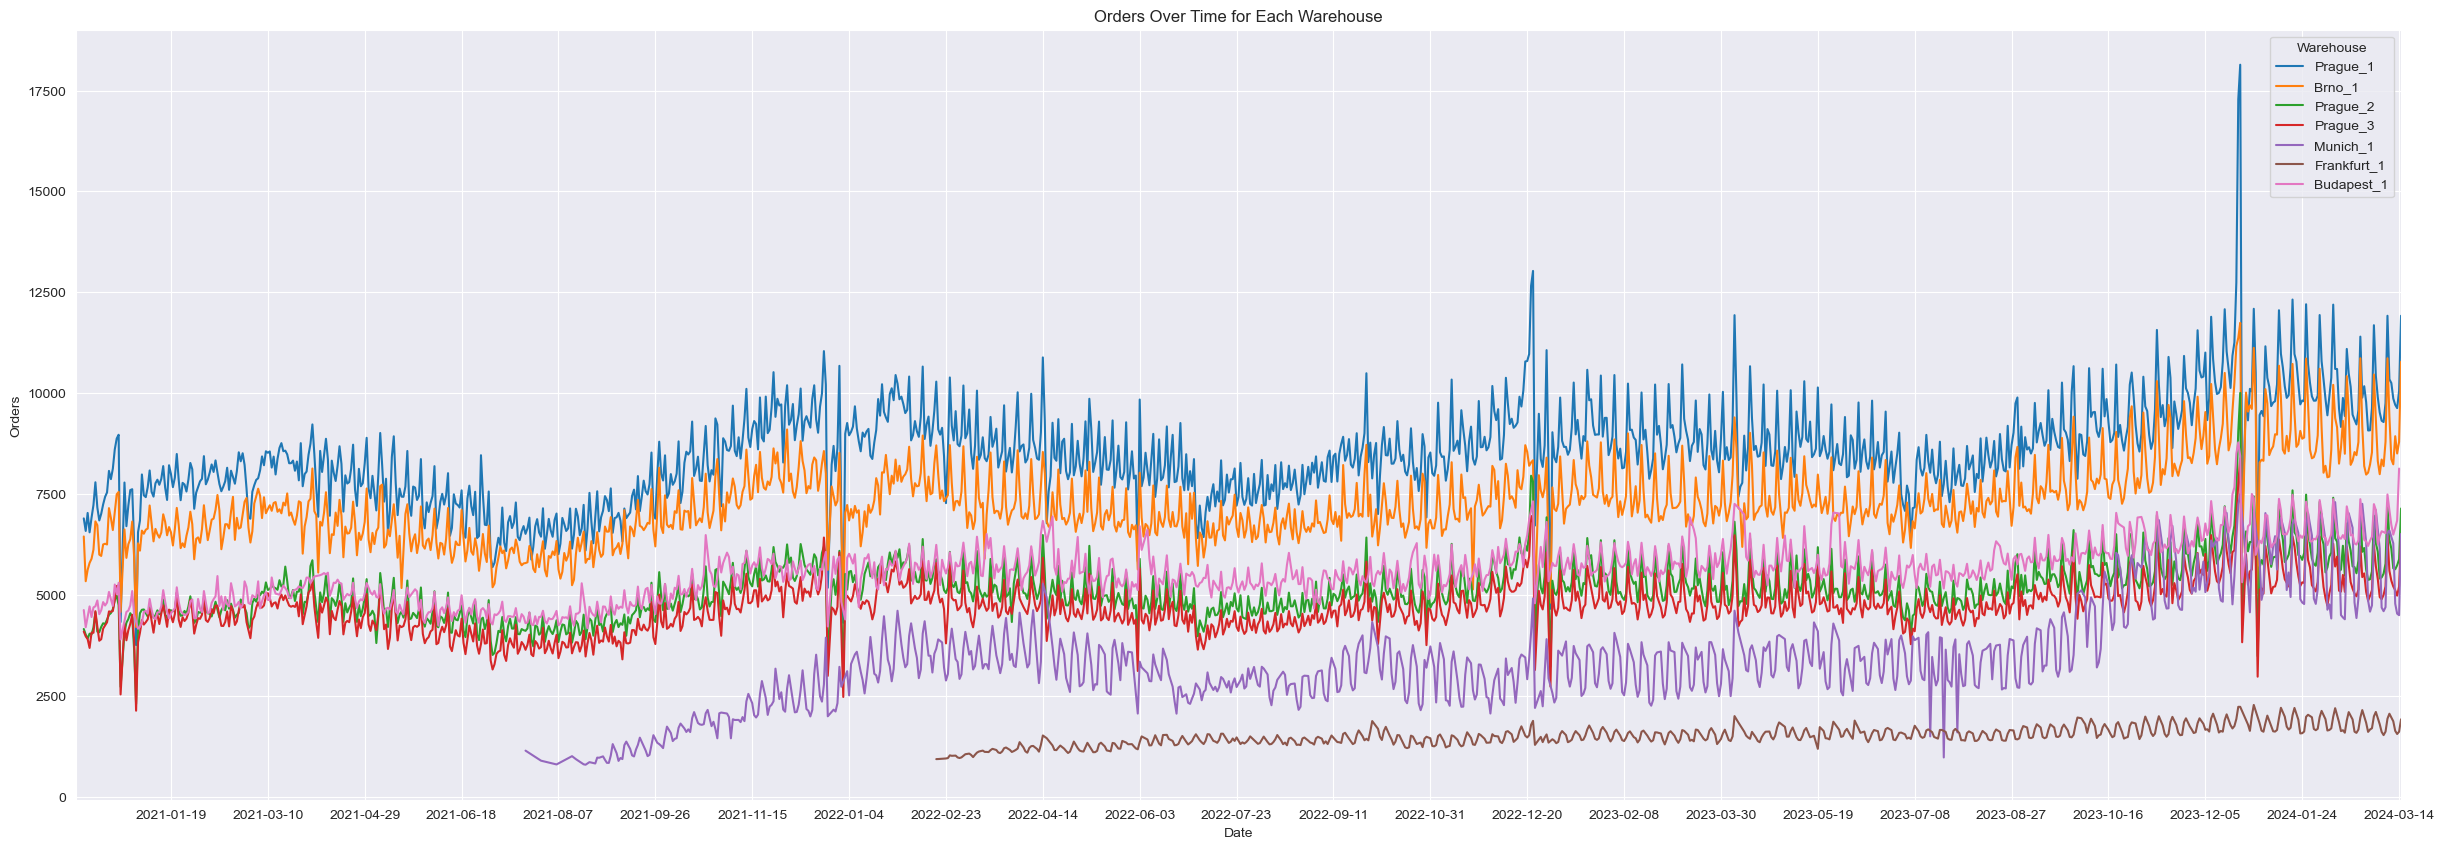

In [38]:
# Set up the plot
plt.figure(figsize=(30, 10))

# Iterate through all unique values of 'warehouse'
for warehouse in df_train['warehouse'].unique():
    sns.lineplot(x=df_train['date'], 
                 y=df_train[df_train['warehouse'] == warehouse]['orders'], 
                 label=warehouse)

# Set x-axis to show date labels every 6 months
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the x-axis limits to zoom into dates from 2022 to the maximum date
plt.xlim(pd.Timestamp('2020-12-01'), pd.Timestamp('2024-03-15'))

# Add numbering to the y-axis
plt.yticks()

# Add labels and title for clarity
plt.xlabel('Date')
plt.ylabel('Orders')
plt.title('Orders Over Time for Each Warehouse')

# Show legend
plt.legend(title='Warehouse')

# Show the plot
plt.show()

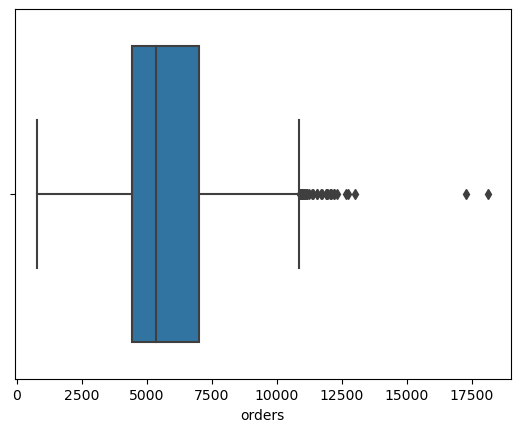

In [90]:
sns.boxplot(x=df_train['orders'], data=df_train)
plt.show()

Checking high order values for legitimacy but they were just before christmas so they make sense:

In [91]:
df_train[df_train['orders'] > 10000].sort_values(by='orders', ascending=False)

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
1110,Prague_1,2023-12-23,18139.0,NaN,0,0,0,0,0,0,0,0.0,0,16.8,2.0,1858.0,45769.0,Prague_1_2023-12-23
1109,Prague_1,2023-12-22,17282.0,NaN,0,0,0,0,0,0,0,0.0,0,8.9,0.0,1912.0,45055.0,Prague_1_2023-12-22
746,Prague_1,2022-12-23,13028.0,NaN,0,0,0,0,0,0,0,1.0,0,8.8,0.0,1832.0,41952.0,Prague_1_2022-12-23
1108,Prague_1,2023-12-21,12744.0,NaN,0,0,0,0,0,0,0,0.0,0,8.5,0.0,1814.0,44282.0,Prague_1_2023-12-21
745,Prague_1,2022-12-22,12661.0,NaN,0,0,0,0,0,0,0,1.0,0,0.3,4.0,1942.0,41465.0,Prague_1_2022-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,Prague_1,2023-02-17,10016.0,NaN,0,0,0,0,1,0,0,1.0,0,1.0,0.0,1644.0,39236.0,Prague_1_2023-02-17
2305,Brno_1,2023-12-26,10013.0,2nd Christmas Day,1,0,0,1,0,0,0,0.0,0,0.0,0.0,2468.0,39227.0,Brno_1_2023-12-26
1099,Prague_1,2023-12-12,10008.0,NaN,0,0,0,0,0,0,0,0.0,0,0.3,0.0,1711.0,42224.0,Prague_1_2023-12-12
1083,Prague_1,2023-11-26,10004.0,NaN,0,0,0,0,0,0,0,0.0,0,1.4,2.0,1657.0,40614.0,Prague_1_2023-11-26


Warehouses:

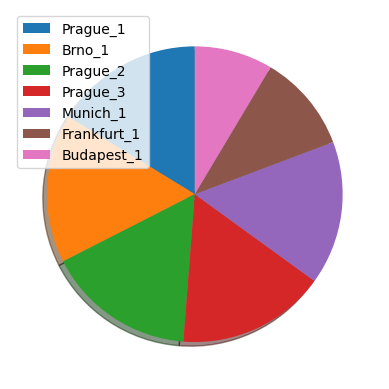

In [92]:
plt.pie(df_train['warehouse'].value_counts(), shadow=True, startangle=90)
plt.legend(df_train['warehouse'].unique(), loc='upper left')
plt.show()

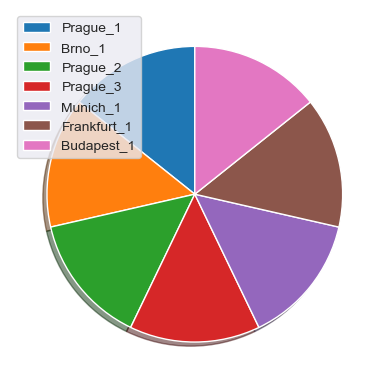

In [37]:
plt.pie(df_test['warehouse'].value_counts(), shadow=True, startangle=90)
plt.legend(df_test['warehouse'].unique(), loc='upper left')
plt.show()

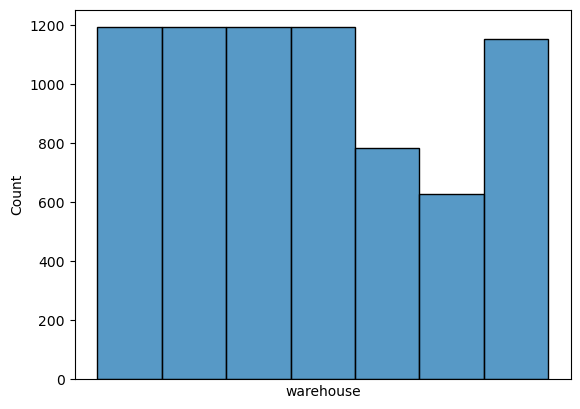

In [93]:
sns.histplot(df_train['warehouse'], bins=400)
plt.xticks([])
plt.show()

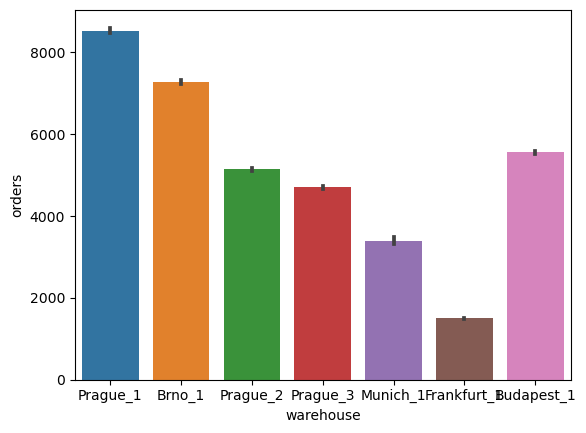

In [94]:
sns.barplot(x=df_train['warehouse'], y=df_train['orders'], data=df_train)
plt.show()

Precipitation and snow:

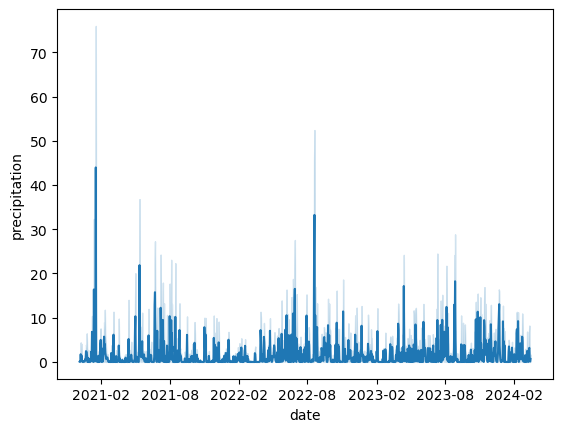

In [95]:
sns.lineplot(x=df_train['date'], y=df_train['precipitation'], data=df_train)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Add numbering to the y-axis
plt.yticks()

plt.show()

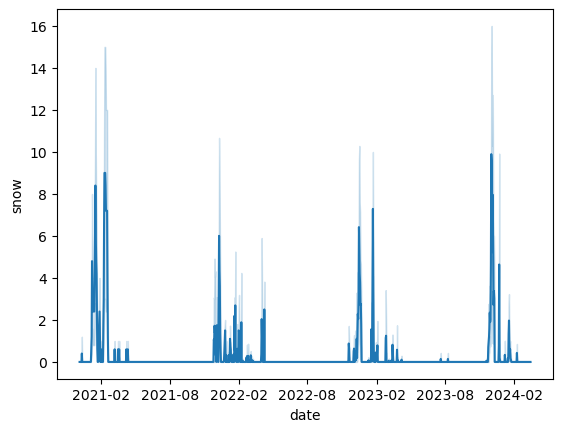

In [96]:
sns.lineplot(x=df_train['date'], y=df_train['snow'], data=df_train)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Add numbering to the y-axis
plt.yticks()

plt.show()

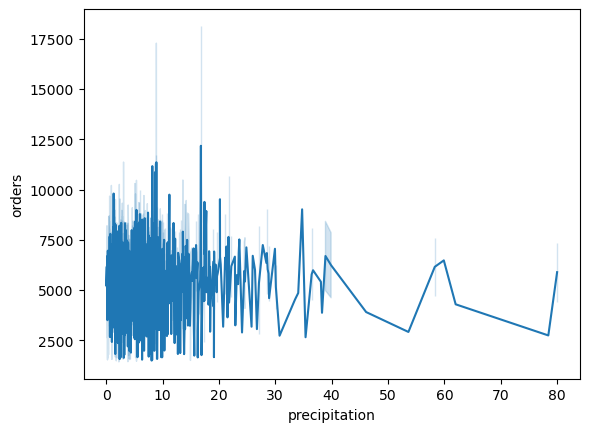

In [97]:
sns.lineplot(x=df_train['precipitation'], y=df_train['orders'], data=df_train)
plt.xticks()
plt.yticks()
plt.show()

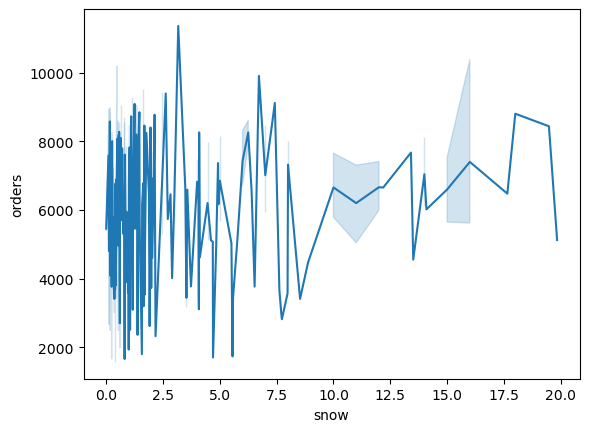

In [98]:
sns.lineplot(x=df_train['snow'], y=df_train['orders'], data=df_train)
plt.xticks()
plt.yticks()
plt.show()

User activity:

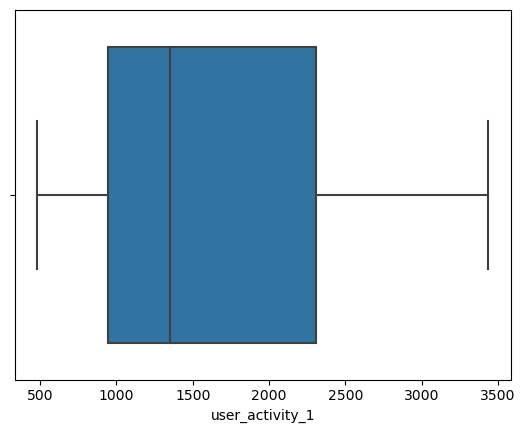

In [99]:
sns.boxplot(x=df_train['user_activity_1'], data=df_train)
plt.show()

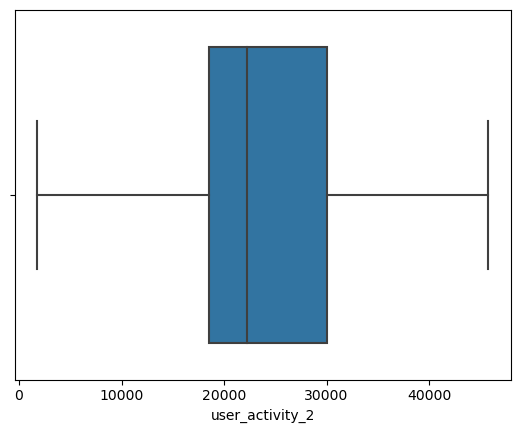

In [100]:
sns.boxplot(x=df_train['user_activity_2'], data=df_train)
plt.show()

In [101]:
df_train['warehouse'].unique()
df_train[df_train['warehouse'] == 'Brno_1'].shape[0]

1193

### Correlation matrix

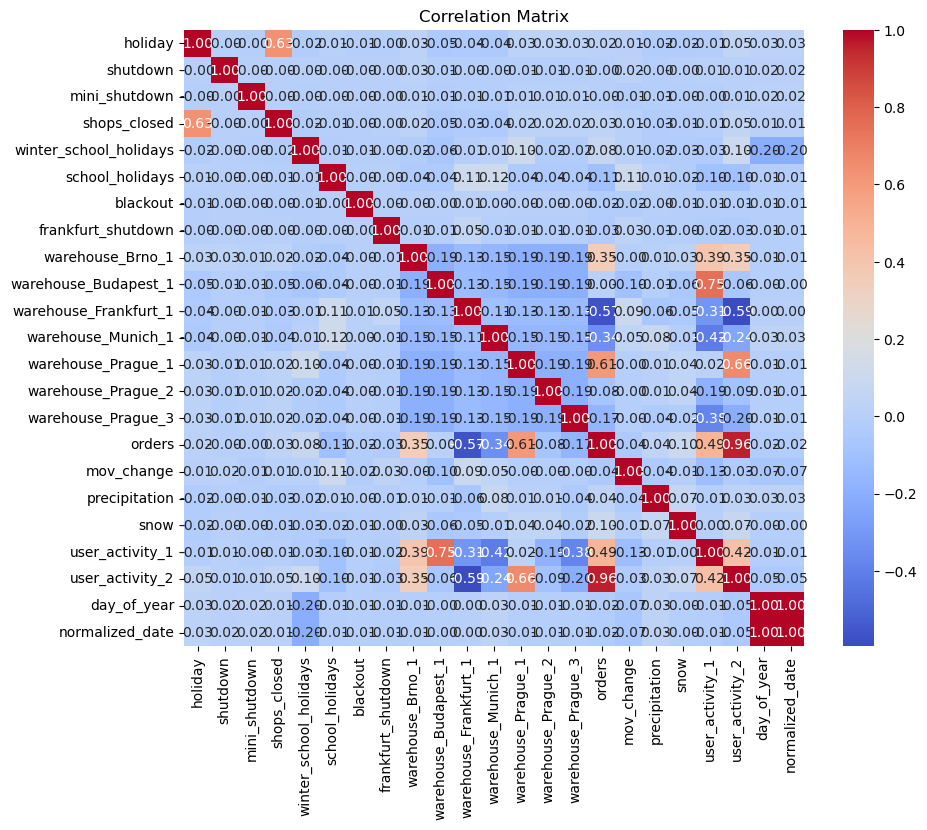

In [103]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Step 1: Convert date into a continuous variable for the day of the year
df_train['date'] = pd.to_datetime(df_train['date'])  # Ensure 'date' column is in datetime format
df_train['day_of_year'] = df_train['date'].dt.dayofyear
df_train['days_in_year'] = df_train['date'].dt.is_leap_year.apply(lambda x: 366 if x else 365)
df_train['normalized_date'] = df_train['day_of_year'] / df_train['days_in_year']

# Step 2: OneHotEncode the 'warehouse' column
warehouse_reshaped = df_train['warehouse'].values.reshape(-1, 1)
onehot = OneHotEncoder(sparse_output=False)  # No need to drop any column
onehot_encoded = onehot.fit_transform(warehouse_reshaped)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot.get_feature_names_out(['warehouse']))

# Step 3: Concatenate the one-hot encoded columns to the original DataFrame
df_encoded_warehouses = pd.concat([df_train.reset_index(drop=True), onehot_encoded_df], axis=1)

# Step 4: Select relevant columns and drop unnecessary ones
columns_to_drop = ['id', 'warehouse', 'holiday_name', 'date', 'days_in_year']
df_selected = df_encoded_warehouses.drop(columns=columns_to_drop)

# Step 5: Apply StandardScaler to the selected DataFrame
binary_features = df_selected.columns[df_selected.nunique() == 2]
continuous_features = df_selected.columns[df_selected.nunique() > 2]

scaler = StandardScaler()
df_continuous_scaled = pd.DataFrame(scaler.fit_transform(df_selected[continuous_features]), columns=continuous_features)

df_selected_scaled = pd.concat([df_selected[binary_features].reset_index(drop=True), df_continuous_scaled.reset_index(drop=True)], axis=1)

# Step 6: Calculate the correlation matrix
correlation_matrix = df_selected_scaled.corr()

# Step 7: Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()